A little time and in search of new inspiration and satisfaction in life, I came across a dataset from StackOverflow. It specifically asks about satisfaction in your current professional developer role, as well as various factors that contribute to it. I would like to build a small regression model here that identifies the factors leading to satisfaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
df = pd.read_csv("./stack-overflow-developer-survey-2024/survey_results_public.csv")

In [2]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [4]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

As you can see, the dataset has a large number of columns. We will first take a look at which ones might be useful to us. The ResponseId does not hold any further value. I see the MainBranch as a way to measure the respondent's proximity to the role of a professional developer. Therefore, I will translate this categorical variable into a numerical one. We proceed in the same way with age.

In [5]:
df_red = df.drop(columns=['ResponseId'])
selfdescription_dict = {'I am a developer by profession' : 5, 'I used to be a developer by profession, but no longer am': 4, 'I am not primarily a developer, but I write code sometimes as part of my work/studies': 3, 'I code primarily as a hobby':2, 'I am learning to code': 1, 'None of these': 0}
df_red['MainBranch'] = df_red['MainBranch'].replace(selfdescription_dict)
age_dict = {'Under 18 years old' : 0, '18-24 years old': 1, '25-34 years old': 2, '35-44 years old': 3, '45-54 years old': 4, '55-64 years old': 5, '65 years or older': 6, 'Prefer not to say': 3, np.nan : 3}
df_red['Age'] = df_red['Age'].replace(age_dict)

The query regarding employment is quite specific. We simplify the whole thing and reduce it to employed or unemployed. The Check-column has no relevance. 

In [6]:
keywords = ['Employed, full-time', 'Employed, part-time', 'freelancer', 'Student, full-time', 'Student, part-time']
df_red['Employment'] = df_red['Employment'].apply(lambda x: any(k in x for k in keywords))

df_red = df_red.drop(columns=['Check'])
df_red.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,5,0,True,Remote,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,3,True,Remote,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,5,4,True,Remote,Hobby;Contribute to op

We proceed in a similar manner with other variables.

In [7]:
df_red = df_red.drop(columns=['CodingActivities'])

education_dict = {'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 5, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4, 'Associate degree (A.A., A.S., etc.)': 3, 'Some college/university study without earning a degree':2, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1, 'Primary/elementary school': 0, 'Something else': 3}
df_red['EdLevel'] = df_red['EdLevel'].replace(education_dict)

df_red['YearsCode'] = df_red['YearsCode'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 60
}).apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

df_red['YearsCodePro'] = df_red['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 60
}).apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)



# Reduction to the question of whether online resources were used.
keywords = ['Online', 'online']
df_red['LearnCode'] = df_red['LearnCode'].apply(lambda x: any(k in str(x) for k in keywords))

# to specific
df_red = df_red.drop(columns=['LearnCodeOnline'])

# Reduction to the question of whether AI is involved.
df_red['TechDoc'] = df_red['TechDoc'].apply(lambda x: True if 'AI-powered' in str(x) else False)

# Get rid of other
keywords = ['Academic researcher', 'Blockchain', 'Cloud infrastructure engineer', 'Data or business analyst', 'Data engineer', 
            'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'Developer Advocate', 
            'Developer, AI', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 
            'Developer Experience', 'Developer, front-end', 'Developer, full-stack', 
            'Developer, game or graphics', 'Developer, mobile', 'Developer, QA or test', 'DevOps specialist', 'Educator', 
            'Engineer, site reliability', 'Engineering manager', 'Hardware Engineer', 'Marketing or sales professional', 
            'Product manager', 'Project manager', 'Research & Development role', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)', 
            'Student', 'System administrator', 'Security professional']
df_red['DevType'] = df_red['DevType'].apply(lambda x: x if any(k in str(x) for k in keywords) else pd.NA)

orgsize_dict = {'Just me - I am a freelancer, sole proprietor, etc.': 1, '2 to 9 employees' : 2, '10 to 19 employees': 3, '20 to 99 employees': 4, '100 to 499 employees': 5, '500 to 999 employees': 6, '1,000 to 4,999 employees': 7, '5,000 to 9,999 employees': 8, '10,000 or more employees': 9, 'I don’t know': 5}
df_red['OrgSize'] = df_red['OrgSize'].replace(orgsize_dict)
df_red['OrgSize'].fillna(df_red['OrgSize'].mean(), inplace=True)

infl_dict = {'I have little or no influence': 0, 'I have some influence': 1, 'I have a great deal of influence': 2}
df_red['PurchaseInfluence'] = df_red['PurchaseInfluence'].replace(infl_dict)

# not relevant
df_red = df_red.drop(columns=['BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal'])


In [8]:
# To make a statement about satisfaction, it might also be interesting to consider which programming languages were used. 
# However, this could make the dataset very complex. To simplify it, we simply take the number of different languages used.
df_red['LanguageHaveWorkedWith'] = df_red['LanguageHaveWorkedWith'].apply(lambda x: str(x).count(';')+1)
# same for Database, Platform, Webframe, Embedded, MiscTech, ToolsTech, NEWCollabTools, OpSys, OfficeStackAsync, OfficeStackSync, AISearchDev
categories = ['DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'AISearchDevHaveWorkedWith']
for i in categories: 
    df_red[i] = df_red[i].apply(lambda x: str(x).count(';')+1)

df_red = df_red.drop(columns=['LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired'])
df_red.head()


,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,LanguageHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchDevHaveWorkedWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,5,0,True,Remote,0.0,False,False,0,0,<NA>,4.93591,NaN,1,1,1,1,1,1,1,1,1,1,1,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,3,True,Remote,4.0,True,False,20,17,"Developer, full-stack",4.93591,NaN,7,3,4,1,1,6,3,1,1,2,1,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,5,4,True,Remote,5.0,True,False,37,27,Developer Experience,4.93591,NaN,1,1,1,1,3,1,1,1,1,4,1,Stack Overflow;Stack Exchange;Stack Overflow B...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,1,1,True,NaN,2.0,True,False,4,0,"Developer, full-stack",4.93591,NaN,10,3,5,1,4,3,1,1,1,1,1,Stack Overflow,Daily or almost daily,No,NaN,Quickly finding code solutions,"No, not really",Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...,NaN,Learning about a codebase;Project planning;Wri...,NaN,NaN,NaN,NaN,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,1,True,NaN,1.0,True,False,9,0,"Developer, full-stack",4.93591,NaN,6,1,1,3,1,3,1,1,4,2,1,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Engage with com...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


There are now some Stack Overflow-specific questions. Even though it would be interesting from Stack Overflow's perspective to find out that Stack Overflow leads to high satisfaction, we will initially exclude these questions.

In [9]:
df_red = df_red.drop(columns=['NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm'])

A few AI-specific questions follow, which will be converted into numerical variables in a similar manner as before or discarded.

In [10]:
ai_dict = {'Yes': 2, 'No, but I plan to soon' : 1, "No, and I don't plan to": 0, np.nan: 0}
df_red['AISelect'] = df_red['AISelect'].replace(ai_dict)
df_red['AISelect'] = df_red['AISelect'].astype(int)

ai_dict = {'Very unfavorable': -2, 'Unfavorable' : -1, 'Indifferent': 0, 'Unsure':0, 'Favorable': 1, 'Very favorable': 2, np.nan: 0}
df_red['AISent'] = df_red['AISent'].replace(ai_dict)

ai_dict = {'Highly distrust': -2, 'Somewhat distrust' : -1, 'Neither trust nor distrust': 0, 'Somewhat trust':1, 'Highly trust': 2}
df_red['AIAcc'] = df_red['AIAcc'].replace(ai_dict)

ai_dict = {'Very poor at handling complex tasks': -2, 'Bad at handling complex tasks' : -1, 
           'Neither good or bad at handling complex tasks': 0, 'Good, but not great at handling complex tasks':1, 
           'Very well at handling complex tasks': 2}
df_red['AIComplex'] = df_red['AIComplex'].replace(ai_dict)
df_red['AIComplex'].fillna(0, inplace=True)

df_red['AIToolCurrently Using'] = df_red['AIToolCurrently Using'].apply(lambda x: str(x).count(';')+1)

df_red = df_red.drop(columns=['AIBen', 'AIThreat', 'AIAcc', 'AIToolInterested in Using', 'AIToolNot interested in Using', 
                              'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 
                              'AINextMuch less integrated', 'AIEthics', 'AIChallenges', 'TBranch', 'ICorPM'])

df_red.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,LanguageHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchDevHaveWorkedWith,AISelect,AISent,AIComplex,AIToolCurrently Using,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,5,0,True,Remote,0.0,False,False,0,0,<NA>,4.93591,NaN,1,1,1,1,1,1,1,1,1,1,1,2,2.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,3,True,Remote,4.0,True,False,20,17,"Developer, full-stack",4.93591,NaN,7,3,4,1,1,6,3,1,1,2,1,0,0.0,0.0,1,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,5,4,True,Remote,5.0,True,False,37,27,Developer Experience,4.93591,NaN,1,1,1,1,3,1,1,1,1,4,1,0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,1,1,True,NaN,2.0,True,False,4,0,"Developer, full-stack",4.93591,NaN,10,3,5,1,4,3,1,1,1,1,1,2,2.0,-1.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,1,True,NaN,1.0,True,False,9,0,"Developer, full-stack",4.93591,NaN,6,1,1,3,1,3,1,1,4,2,1,0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [11]:
# again translation o
knowledge_dict = {'Agree':1, 'Strongly agree': 2,  'Neither agree nor disagree': 0,  'Disagree': -1, 
 'Strongly disagree': -2, np.nan: 0}

for i in list(range(1, 10)): 
    df_red['Knowledge_'+str(i)] = df_red['Knowledge_'+str(i)].replace(knowledge_dict)

print(df_red['Knowledge_1'].unique())

[ 0.  1.  2. -1. -2.]


In [12]:
df_red = df_red.drop(columns=['Frequency_1', 'Frequency_2', 'Frequency_3'])

In [13]:
time_dict = {'Less than 15 minutes a day':0, '15-30 minutes a day': 1,  '30-60 minutes a day': 2,  '60-120 minutes a day': 3, 'Over 120 minutes a day': 4, np.nan: 3}
df_red['TimeSearching'] = df_red['TimeSearching'].replace(time_dict)
df_red['TimeAnswering'] = df_red['TimeAnswering'].replace(time_dict)

df_red['Frustration'] = df_red['Frustration'].apply(lambda x: str(x).count(';')+1)

df_red = df_red.drop(columns=['ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion', 'SurveyLength', 'SurveyEase'])

keywords=['Software Development', 'Computer Systems Design and Services', 'Internet, Telecomm or Information Services', 'Fintech', 'Energy', 'Government', 'Banking/Financial Services', 'Manufacturing', 'Transportation, or Supply Chain', 'Healthcare', 'Retail and Consumer Services', 'Higher Education', 'Media & Advertising Services', 'Insurance']
df_red['Industry'] = df_red['Industry'].apply(lambda x: x if any(k in str(x) for k in keywords) else pd.NA)

df_red['ConvertedCompYearly'].fillna(df_red['ConvertedCompYearly'].mean(), inplace=True)


In [14]:
# The JobSatPoints-columns ask for the importance of different attributes and their contribution to satisfaction
# Here we expect NaN-values to assign no contribution. 
jobs_attr = [1, 4, 5, 6, 7, 8, 9, 10, 11]
for i in jobs_attr: 
    df_red['JobSatPoints_'+str(i)]=df_red['JobSatPoints_'+str(i)].fillna(0)

In [15]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      65437 non-null  int64  
 1   Age                             65437 non-null  int64  
 2   Employment                      65437 non-null  bool   
 3   RemoteWork                      54806 non-null  object 
 4   EdLevel                         60784 non-null  float64
 5   LearnCode                       65437 non-null  bool   
 6   TechDoc                         65437 non-null  bool   
 7   YearsCode                       65437 non-null  int64  
 8   YearsCodePro                    65437 non-null  int64  
 9   DevType                         56987 non-null  object 
 10  OrgSize                         65437 non-null  float64
 11  PurchaseInfluence               47406 non-null  float64
 12  LanguageHaveWorkedWith          

In [16]:
df_dum_1 = pd.get_dummies(df_red[['RemoteWork']], dummy_na=True)
df_dum_2 = df_red.drop(['RemoteWork', 'DevType', 'Industry', 'WorkExp', 'AIComplex', 'OrgSize'], axis=1)
df_dum = pd.concat([df_dum_1, df_dum_2], axis=1)

In [17]:
df_cleaned = df_dum.dropna()
df_dum.info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   RemoteWork_Hybrid (some remote, some in-person)  65437 non-null  bool   
 1   RemoteWork_In-person                             65437 non-null  bool   
 2   RemoteWork_Remote                                65437 non-null  bool   
 3   RemoteWork_nan                                   65437 non-null  bool   
 4   MainBranch                                       65437 non-null  int64  
 5   Age                                              65437 non-null  int64  
 6   Employment                                       65437 non-null  bool   
 7   EdLevel                                          60784 non-null  float64
 8   LearnCode                                        65437 non-null  bool   
 9   TechDoc                     

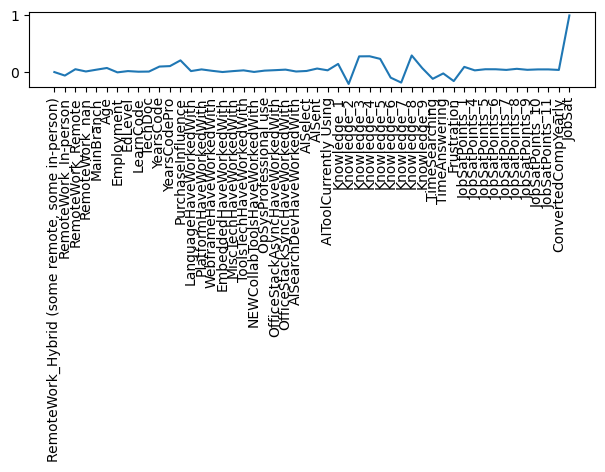

,Column,Correlation
0,"RemoteWork_Hybrid (some remote, some in-person)",-0.000571
1,RemoteWork_In-person,-0.062423
2,RemoteWork_Remote,0.049728
3,RemoteWork_nan,0.010014
4,MainBranch,0.041387
5,Age,0.071508
6,Employment,-0.005886
7,EdLevel,0.016614
8,LearnCode,0.005659
9,TechDoc,0.008240


In [18]:
correlations = df_cleaned.corr()['JobSat']

plt.plot(correlations.values)
plt.xticks(ticks=range(len(correlations)), labels=correlations.index, rotation=90)
plt.tight_layout()
plt.show()
correlation = pd.DataFrame({'Column': df_cleaned.columns.tolist(), 'Correlation': df_cleaned.corr()['JobSat'].tolist()})
correlation

array([[<Axes: title={'center': 'MainBranch'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EdLevel'}>,
        <Axes: title={'center': 'YearsCode'}>,
        <Axes: title={'center': 'YearsCodePro'}>,
        <Axes: title={'center': 'PurchaseInfluence'}>,
        <Axes: title={'center': 'LanguageHaveWorkedWith'}>],
       [<Axes: title={'center': 'PlatformHaveWorkedWith'}>,
        <Axes: title={'center': 'WebframeHaveWorkedWith'}>,
        <Axes: title={'center': 'EmbeddedHaveWorkedWith'}>,
        <Axes: title={'center': 'MiscTechHaveWorkedWith'}>,
        <Axes: title={'center': 'ToolsTechHaveWorkedWith'}>,
        <Axes: title={'center': 'NEWCollabToolsHaveWorkedWith'}>,
        <Axes: title={'center': 'OpSysProfessional use'}>],
       [<Axes: title={'center': 'OfficeStackAsyncHaveWorkedWith'}>,
        <Axes: title={'center': 'OfficeStackSyncHaveWorkedWith'}>,
        <Axes: title={'center': 'AISearchDevHaveWorkedWith'}>,
        <Axes: title={'cente

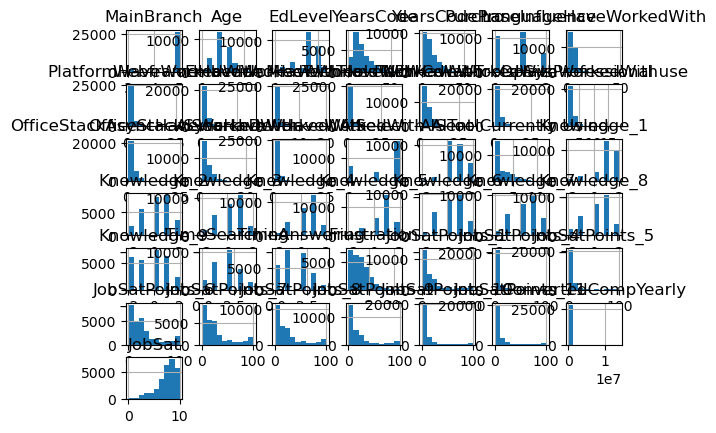

In [19]:
df_cleaned.hist(bins=10)

In [20]:
X = df_cleaned.drop("JobSat", axis=1)
y = df_cleaned["JobSat"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [23]:
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:20].round(2))

[6.03 7.42 6.39 7.54 6.01 6.87 8.77 6.78 6.36 9.16 7.36 4.76 9.64 5.82
 6.34 6.61 8.03 8.   7.64 7.24]


In [24]:
print(y_test[:20].values)

[7. 7. 6. 8. 9. 8. 9. 8. 7. 8. 5. 0. 9. 4. 1. 7. 6. 8. 8. 7.]


In [25]:
import numpy as np
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:20].values)

Relative errors in per cent:  [1.38495910e+01 6.03762732e+00 6.46511391e+00 5.73486174e+00
 3.31792991e+01 1.41337199e+01 2.57773784e+00 1.52032572e+01
 9.18682234e+00 1.45101957e+01 4.72561951e+01            inf
 7.10254490e+00 4.54651071e+01 5.34415871e+02 5.61881225e+00
 3.37712474e+01 4.10808250e-02 4.50223126e+00 3.40191839e+00]


In [26]:
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(rmse_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(rmse_test)

1.8562717620829396
1.8465887872607543


In [31]:
df_red['JobSat'].describe()

count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [32]:
print(linear_predictions_train.mean())

6.941009369405752


In [27]:
# train a decision tree classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10, random_state=13)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=13)

In [28]:
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [29]:
# calculate accuracy on training and test set
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_train)
print(acc_test)

0.456789027475698
0.27835966625244096


In [30]:
print(y_pred_test[:30])
print(y_test[:30])

[ 8.  8.  7.  8.  7.  8.  8.  7.  7. 10.  8.  8. 10.  7.  8.  8.  8.  8.
  8.  8.  7.  8.  7.  8.  8.  8.  8.  8.  8.  8.]
15426    7.0
57157    7.0
6662     6.0
25740    8.0
28413    9.0
26160    8.0
5652     9.0
32935    8.0
51148    7.0
17912    8.0
1933     5.0
56166    0.0
52632    9.0
21133    4.0
9548     1.0
17922    7.0
37916    6.0
38652    8.0
42694    8.0
51250    7.0
39199    1.0
48250    9.0
32794    4.0
27624    7.0
7703     9.0
34803    7.0
36361    7.0
36251    4.0
31956    8.0
23445    7.0
Name: JobSat, dtype: float64
